In [107]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
rng = np.random
learning_rate = 0.01
training_epochs = 5000
display_step = 50
batch_size = 30

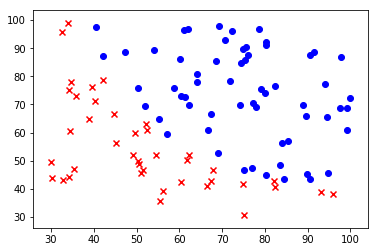

In [108]:
X_train = pd.read_csv('./data.csv',header = None,usecols = [0,1]).values
Y = pd.read_csv('./data.csv',header = None,usecols = [2]).values.flatten()
for (x,y) in zip(X_train,Y):
    if(y==0):
        plt.scatter(x[0],x[1],marker = 'x',color = 'r')
    elif(y==1):
        plt.scatter(x[0],x[1],marker = 'o',color = 'b')
plt.show()

X_train = np.reshape(X_train,(100,2))
Y_train = []
for i in range(len(Y)):
    if(Y[i]==0):
        Y_train.append([1,0])
    else:
        Y_train.append([0,1])

In [110]:
X = tf.placeholder(tf.float32,[None,2])
Y = tf.placeholder(tf.float32,[None,2])

W = tf.Variable(tf.zeros([2,2]))
b = tf.Variable(tf.zeros([2]))

pred = tf.nn.softmax(tf.matmul(X,W)+b)

cross_entropy = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(pred),reduction_indices = [1]))

optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cross_entropy)

model = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(model)
    for epoch in range(training_epochs):
        total_batch = int(100/batch_size)
        X_batches = np.array_split(X_train, total_batch)
        Y_batches = np.array_split(Y_train, total_batch)
        for t in range(total_batch):
            batch_x, batch_y = X_batches[t], Y_batches[t]    
            c = sess.run([optimizer,cross_entropy],feed_dict = {X:batch_x , Y:batch_y})
            cost = c[1]/total_batch
        if (epoch+1) % display_step ==0:
            print("Epoch:{} cost :{}".format(epoch,cost))
    print("Optimization Finished")
    training_cost = sess.run(cross_entropy,feed_dict = {X:X_train , Y:Y_train})
    print("Final cost is:{},Weight = {} bias = {}".format(training_cost,sess.run(W),sess.run(b)))
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(Y_train, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Accuracy:", accuracy.eval({X: X_train, Y: Y_train})*100)
    global result 
    result = tf.argmax(pred, 1).eval({X: X_train, Y: Y_train})
    

Epoch:49 cost :0.15935284892717996
Epoch:99 cost :0.14373637239138284
Epoch:149 cost :0.13148238261540732
Epoch:199 cost :0.1219699780146281
Epoch:249 cost :0.11450599630673726
Epoch:299 cost :0.10855440298716228
Epoch:349 cost :0.10372624794642131
Epoch:399 cost :0.09974388281504314
Epoch:449 cost :0.09640855590502422
Epoch:499 cost :0.09357617298762004
Epoch:549 cost :0.09114113450050354
Epoch:599 cost :0.08902489145596822
Epoch:649 cost :0.08716777960459392
Epoch:699 cost :0.08552408218383789
Epoch:749 cost :0.08405838410059611
Epoch:799 cost :0.08274263143539429
Epoch:849 cost :0.0815543532371521
Epoch:899 cost :0.08047561347484589
Epoch:949 cost :0.07949162026246388
Epoch:999 cost :0.07859021425247192
Epoch:1049 cost :0.0777612974246343
Epoch:1099 cost :0.07699649532636006
Epoch:1149 cost :0.07628857096036275
Epoch:1199 cost :0.07563144465287526
Epoch:1249 cost :0.07501983145872752
Epoch:1299 cost :0.07444943984349568
Epoch:1349 cost :0.07391616702079773
Epoch:1399 cost :0.0734166